In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

2.93 ms ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# # Create a list for holding cities
# cities = []

# # Use the tuple() function to display the latitude and longitude combinations.
# for coordinate in coordinates: # iterate through each coordinate pair and print out nearest city and its country
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    
#     # If the city is unique, then we will add it to the cities list.
#     if city not in cities:
#         cities.append(city)
        
# # Print the city count to confirm sufficient count.
# len(cities)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in our list that we generated above
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | north bend
Processing Record 2 of Set 12 | fairbanks
Processing Record 3 of Set 12 | amderma
City not found. Skipping...
Processing Record 4 of Set 12 | cape town
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | hobart
Processing Record 7 of Set 12 | sitka
Processing Record 8 of Set 12 | sovetskiy
Processing Record 9 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 12 | mataura
Processing Record 11 of Set 12 | ilulissat
Processing Record 12 of Set 12 | jamestown
Processing Record 13 of Set 12 | georgetown
Processing Record 14 of Set 12 | carnarvon
Processing Record 15 of Set 12 | puerto ayora
Processing Record 16 of Set 12 | rikitea
Processing Record 17 of Set 12 | nikolskoye
Processing Record 18 of Set 12 | mahebourg
Processing Record 19 of Set 12 | hasaki
Processing Record 20 of Set 12 | vaini
Processing Record 21 of Set 12 | salym
Processing Record 22 of Set 12 | bluff
Processing Record 23 of Set

Processing Record 35 of Set 15 | aklavik
Processing Record 36 of Set 15 | port elizabeth
Processing Record 37 of Set 15 | ribeira grande
Processing Record 38 of Set 15 | praia
Processing Record 39 of Set 15 | cap malheureux
Processing Record 40 of Set 15 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 15 | tasiilaq
Processing Record 42 of Set 15 | mahanoro
Processing Record 43 of Set 15 | tura
Processing Record 44 of Set 15 | mincivan
Processing Record 45 of Set 15 | kungalv
Processing Record 46 of Set 15 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 15 | prince rupert
Processing Record 48 of Set 15 | wajir
Processing Record 49 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 15 | souillac
Processing Record 1 of Set 16 | mandalgovi
Processing Record 2 of Set 16 | victoria
Processing Record 3 of Set 16 | quatre cocos
Processing Record 4 of Set 16 | mogadishu
Processing Record 5 of Set 16 | fresno
Proces

Processing Record 22 of Set 19 | sao joao da barra
Processing Record 23 of Set 19 | peschanokopskoye
Processing Record 24 of Set 19 | shangrao
Processing Record 25 of Set 19 | praxedis guerrero
Processing Record 26 of Set 19 | bollnas
Processing Record 27 of Set 19 | honningsvag
Processing Record 28 of Set 19 | walvis bay
Processing Record 29 of Set 19 | cuamba
Processing Record 30 of Set 19 | hay river
Processing Record 31 of Set 19 | kahului
Processing Record 32 of Set 19 | alugan
Processing Record 33 of Set 19 | nhulunbuy
Processing Record 34 of Set 19 | sainte-rose
Processing Record 35 of Set 19 | corrales
Processing Record 36 of Set 19 | turtas
Processing Record 37 of Set 19 | sataua
City not found. Skipping...
Processing Record 38 of Set 19 | fomboni
Processing Record 39 of Set 19 | jumla
Processing Record 40 of Set 19 | half moon bay
Processing Record 41 of Set 19 | sangar
Processing Record 42 of Set 19 | alofi
Processing Record 43 of Set 19 | faya
Processing Record 44 of Set 19

Processing Record 10 of Set 23 | ayagoz
Processing Record 11 of Set 23 | correntina
Processing Record 12 of Set 23 | loveland
Processing Record 13 of Set 23 | dongli
Processing Record 14 of Set 23 | djibo
Processing Record 15 of Set 23 | bay roberts
Processing Record 16 of Set 23 | puerto escondido
Processing Record 17 of Set 23 | eltham
Processing Record 18 of Set 23 | namibe
Processing Record 19 of Set 23 | monrovia
Processing Record 20 of Set 23 | nsoko
Processing Record 21 of Set 23 | lodja
Processing Record 22 of Set 23 | dera din panah
City not found. Skipping...
Processing Record 23 of Set 23 | nsanje
Processing Record 24 of Set 23 | port keats
Processing Record 25 of Set 23 | ponta delgada
Processing Record 26 of Set 23 | ekhabi
Processing Record 27 of Set 23 | astoria
Processing Record 28 of Set 23 | pimentel
Processing Record 29 of Set 23 | san patricio
Processing Record 30 of Set 23 | karaul
City not found. Skipping...
Processing Record 31 of Set 23 | tirumullaivasal
Process

In [10]:
len(city_data)

544

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Bend,43.4065,-124.2243,58.91,97,90,4.61,US,2021-08-05 14:29:17
1,Fairbanks,64.8378,-147.7164,60.76,75,1,8.05,US,2021-08-05 14:25:05
2,Cape Town,-33.9258,18.4232,66.11,66,20,1.99,ZA,2021-08-05 14:29:18
3,Ushuaia,-54.8000,-68.3000,49.62,61,0,4.61,AR,2021-08-05 14:29:18
4,Hobart,-42.8794,147.3294,53.46,64,98,4.00,AU,2021-08-05 14:29:19
5,Sitka,57.0531,-135.3300,57.09,82,75,6.91,US,2021-08-05 14:25:24
6,Sovetskiy,61.3614,63.5842,78.26,60,100,4.34,RU,2021-08-05 14:29:20
7,Mataura,-46.1927,168.8643,33.48,96,98,1.74,NZ,2021-08-05 14:29:20
8,Ilulissat,69.2167,-51.1000,48.22,71,40,5.75,GL,2021-08-05 14:29:21
9,Jamestown,42.0970,-79.2353,73.33,73,75,8.05,US,2021-08-05 14:29:21


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,North Bend,US,2021-08-05 14:29:17,43.4065,-124.2243,58.91,97,90,4.61
1,Fairbanks,US,2021-08-05 14:25:05,64.8378,-147.7164,60.76,75,1,8.05
2,Cape Town,ZA,2021-08-05 14:29:18,-33.9258,18.4232,66.11,66,20,1.99
3,Ushuaia,AR,2021-08-05 14:29:18,-54.8000,-68.3000,49.62,61,0,4.61
4,Hobart,AU,2021-08-05 14:29:19,-42.8794,147.3294,53.46,64,98,4.00
...,...,...,...,...,...,...,...,...,...
539,Fare,PF,2021-08-05 14:33:17,-16.7000,-151.0167,78.48,73,15,9.31
540,Aukra,NO,2021-08-05 14:33:18,62.7925,6.9190,71.49,43,20,10.36
541,Sabha,LY,2021-08-05 14:33:18,27.0377,14.4283,106.81,7,0,13.44
542,Antofagasta,CL,2021-08-05 14:32:03,-23.6500,-70.4000,65.21,61,0,5.10


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


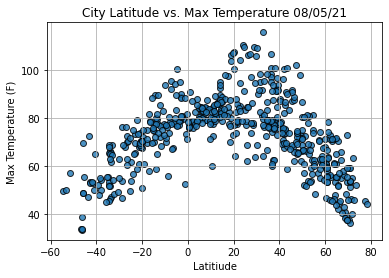

In [16]:
lat_scatter = plt.scatter(lat,
           max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitiude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

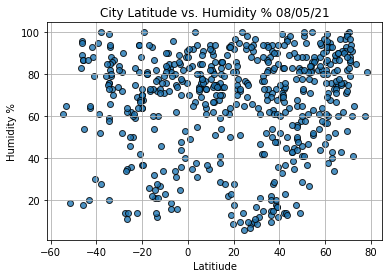

In [17]:
lat_scatter = plt.scatter(lat,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitiude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

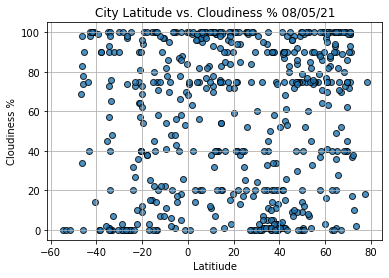

In [20]:
lat_scatter = plt.scatter(lat,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness % "+ time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitiude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

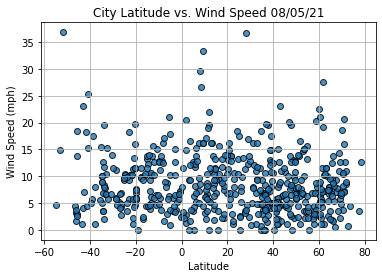

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lat,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()